In [167]:
import pandas as pd

In [168]:
symbols = ['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT','AVAXUSDT','LUNAUSDT','SOLUSDT',
           'DOTUSDT','LINKUSDT','SHIBUSDT','MATICUSDT',]

In [169]:
api_key = '2t2q700q3qzugalPMVkkNLd8KRNckgDHWe3S2jdjec5Yj1EYVLuvgmK1J62QhNo5'
api_secret = 'wBbiwigEew5Nr471moMcY0HzWsMcwRsVuhXBSJC0E95vjDTjE9znMPIu86yl4R4w'

In [170]:
from binance import Client

In [171]:
client = Client(api_key,api_secret)

In [172]:
tradesf = pd.DataFrame({'symbol':symbols})

In [173]:
tradesf

,symbol
0,BTCUSDT
1,ETHUSDT
2,ADAUSDT
3,BNBUSDT
4,XRPUSDT
5,AVAXUSDT
6,LUNAUSDT
7,SOLUSDT
8,DOTUSDT
9,LINKUSDT


In [174]:
tradesf['open_trade'] = False

In [175]:
tradesf['quantity'] = 0

In [176]:
tradesf

,symbol,open_trade,quantity
0,BTCUSDT,False,0
1,ETHUSDT,False,0
2,ADAUSDT,False,0
3,BNBUSDT,False,0
4,XRPUSDT,False,0
5,AVAXUSDT,False,0
6,LUNAUSDT,False,0
7,SOLUSDT,False,0
8,DOTUSDT,False,0
9,LINKUSDT,False,0


In [177]:
def changepos(symbol, order, buy=True):
    if order['side'] =='BUY':
        tradesf.loc[tradesf.symbol == symbol, 'open_trade'] = True
        tradesf.loc[tradesf.symbol == symbol, 'quantity'] = float(order['origQty'])
    else:
        tradesf.loc[tradesf.symbol == symbol, 'open_trade'] = False
        tradesf.loc[tradesf.symbol == symbol, 'quantity'] = 0


In [178]:
def getminutedata(symbol):
    frame = pd.DataFrame(client.get_historical_klines(symbol, '1m', '200 minutes ago UTC'))
    frame = frame[[0,4]]
    frame.columns = ['Time' , 'Close' ]
    frame.set_index('Time', inplace=True)
    frame.index = pd.to_datetime(frame.index, unit ='ms')
    frame.Close = frame.Close.astype(float)
    return frame

In [179]:
df = getminutedata('BTCUSDT')

In [180]:
df

,Close
Time,
2022-04-12 01:21:00,39659.99
2022-04-12 01:22:00,39660.79
2022-04-12 01:23:00,39642.45
2022-04-12 01:24:00,39659.34
2022-04-12 01:25:00,39602.71
...,...
2022-04-12 04:36:00,39805.02
2022-04-12 04:37:00,39782.98
2022-04-12 04:38:00,39787.71


In [181]:
import ta

In [182]:
def applyindicators(df):
    df['SMA_200'] = df.Close.rolling(200).mean()
    df['SMA_20'] = df.Close.rolling(20).mean()
    df['stddev'] = df.Close.rolling(20).std()
    df['Upper'] = df.SMA_20+2 * df.stddev
    df['Lower'] = df.SMA_20-2 * df.stddev
    df['rsi'] = ta.momentum.rsi(df.Close, 2)

In [183]:
a = applyindicators(df)

In [184]:
df

,Close,SMA_200,SMA_20,stddev,Upper,Lower,rsi
Time,,,,,,,
2022-04-12 01:21:00,39659.99,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-12 01:22:00,39660.79,NaN,NaN,NaN,NaN,NaN,100.000000
2022-04-12 01:23:00,39642.45,NaN,NaN,NaN,NaN,NaN,2.134472
2022-04-12 01:24:00,39659.34,NaN,NaN,NaN,NaN,NaN,65.079970
2022-04-12 01:25:00,39602.71,NaN,NaN,NaN,NaN,NaN,12.249140
...,...,...,...,...,...,...,...
2022-04-12 04:36:00,39805.02,NaN,39786.5460,46.021816,39878.589633,39694.502367,70.306665
2022-04-12 04:37:00,39782.98,NaN,39791.4450,39.378906,39870.202812,39712.687188,18.246826
2022-04-12 04:38:00,39787.71,NaN,39794.7745,35.769658,39866.313815,39723.235185,37.963483


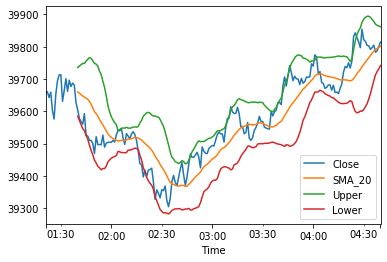

In [185]:
df[['Close','SMA_20','Upper','Lower']].plot()

In [186]:
import numpy as np

In [187]:
def condition(df):
    df['Buy'] = np.where((df.Close < df.Lower) & (df.Close > df.SMA_200), 1,0)
    df['Sell'] = np.where((df.rsi>50), 1,0)

In [188]:
condition(df)

In [189]:
df

,Close,SMA_200,SMA_20,stddev,Upper,Lower,rsi,Buy,Sell
Time,,,,,,,,,
2022-04-12 01:21:00,39659.99,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2022-04-12 01:22:00,39660.79,NaN,NaN,NaN,NaN,NaN,100.000000,0,1
2022-04-12 01:23:00,39642.45,NaN,NaN,NaN,NaN,NaN,2.134472,0,0
2022-04-12 01:24:00,39659.34,NaN,NaN,NaN,NaN,NaN,65.079970,0,1
2022-04-12 01:25:00,39602.71,NaN,NaN,NaN,NaN,NaN,12.249140,0,0
...,...,...,...,...,...,...,...,...,...
2022-04-12 04:36:00,39805.02,NaN,39786.5460,46.021816,39878.589633,39694.502367,70.306665,0,1
2022-04-12 04:37:00,39782.98,NaN,39791.4450,39.378906,39870.202812,39712.687188,18.246826,0,0
2022-04-12 04:38:00,39787.71,NaN,39794.7745,35.769658,39866.313815,39723.235185,37.963483,0,0


In [190]:
#buy limit order

In [191]:
info = client.get_symbol_info(symbol='ETHUSDT')


In [192]:
def buy(symbol,investment):
    order = client.order_limit_buy(
    symbol = symbol,
    price = pricecalc(symbol),
    quantity = quantitycalc(symbol,investment))
    changepos(symbol,order)
    print(order)

In [193]:
def sell(symbol):
    order = client.create_order(
    symbol=symbol,
    side = 'SELL',
    type='MARKET',
    quantity = tradesf[trades.symbol == symbol].quantity.values[0])
    changepos(symbol,order)
    print(order)

In [197]:
def trader(investment):
    #selling conditions
    for symbol in tradesf[tradesf.open_trade == True].symbol:
        df = getminutedata(symbol)
        applyindicators(df)
        condition(df)
        lastrow = df.tail(1)
        if lastrow.Sell.values[0] == 1 and not client.get_open_orders(symbol=symbol):
            sell(symbol)
            
        
    for symbol in tradesf[tradesf.open_trade == False].symbol:
        df = getminutedata(symbol)
        applyindicators(df)
        condition(df)
        lastrow = df.tail(1)
        if lastrow.Sell.values[0] == 1:
            buy(symbol,investment)
        else:
            print(f'Buying Condition for this {symbol} is not fulfilled')

In [198]:
import time

In [199]:
while True:
    trader(100)
   

Buying Condition for this BTCUSDT is not fulfilled


BinanceAPIException: APIError(code=-2010): Account has insufficient balance for requested action.

In [ ]:
tradesf